<a href="https://colab.research.google.com/github/hwarang97/hukppenhiem/blob/main/prac_dacon_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [94]:
n_dim = 2 # 특성 갯수 지정
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [95]:
# 데이터 확인

x = pd.DataFrame(x_train)
y = pd.DataFrame(y_train)

print('======= x =========')
print(x.head(5))
print(x.tail(5))
print(x.describe())
print(x.info())
print(x.count())
print()

print('======= y =========')
print(y.head(5))
print(y.tail(5))
print(y.describe())
print(y.info())
print(y.value_counts())

======= x =========
          0         1
0 -0.922628 -0.866495
1 -1.581195  0.852416
2  1.161590  0.875887
3 -1.708374  1.395599
4  1.464639 -1.108627
           0         1
75  0.747283 -0.892695
76 -0.871835  1.032793
77  0.907134  1.208328
78  1.059132 -0.548657
79 -1.290797 -0.994847
               0          1
count  80.000000  80.000000
mean    0.030148   0.036722
std     1.065296   1.050308
min    -1.708374  -1.794379
25%    -0.945664  -0.960832
50%    -0.032700  -0.141819
75%     1.052164   1.019670
max     1.585465   1.883704
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       80 non-null     float64
 1   1       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB
None
0    80
1    80
dtype: int64

======= y =========
   0
0  1
1  3
2  0
3  3
4  2
    0
75  2
76  3
77  0
78  2
79  1
               0
count  80.000000
mean    1.500

In [96]:
# type transfer
x_train = torch.tensor(x_train, dtype=torch.float)
x_test = torch.tensor(x_test, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

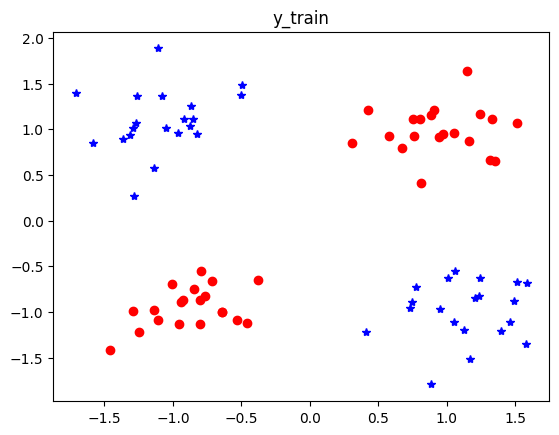

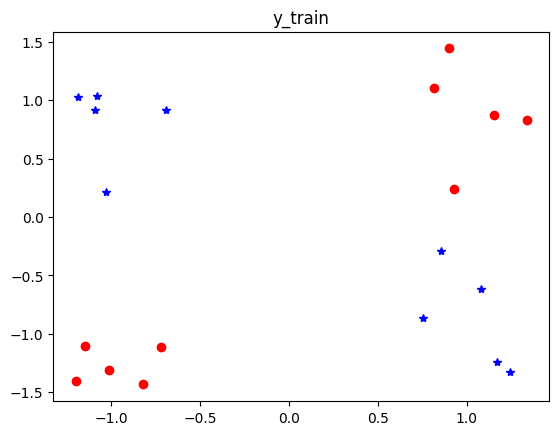

In [97]:
# 데이터 라벨링 

# for i in [0,1]:
#     y_train[y_train==i] = 0

# for i in [1,2]:
#     y_train[y_train==i] = 1

def labeling(y_: torch.tensor, from_:list, to_: int) -> None:
    for i in from_:
        y_[y_==i] = to_

labeling(y_train, [0,1], 0)
labeling(y_train, [2,3], 1)
labeling(y_test, [0,1], 0)
labeling(y_test, [2,3], 1)


def show(title_:str, x_:torch.tensor, y_:torch.tensor):

    '''
    need matplotlib.pyplot as plt
    '''

    plt.figure()
    plt.title(title_)
    for i in range(len(y_)):
        plt.plot(x_[i,0], x_[i,1], 'ro' if y_[i] == 0 else 'b*')
    plt.show()

# plt.figure()
# plt.title('y_train')
# for i in range(len(y_train)):
#     plt.plot(x_train[i,0], x_train[i,1], 'ro' if y_train[i] == 0 else 'b*')
# plt.show()
show('y_train', x_train, y_train)

# plt.figure()
# plt.title('y_test')
# for i in range(len(y_train)):
#     plt.plot(x_train[i,0], x_train[i,1], 'ro' if y_train[i] == 0 else 'b*')
# plt.show()
show('y_train', x_test, y_test)

In [98]:
# hyper parameters
input_size = 2
hidden_size = 10
lr = 0.03
epochs = 2000

In [99]:
# 모델 만들기

class mynn(nn.Module):
    def __init__(self, input_size_, hidden_size_):
        super().__init__()

        self.linear = nn.Sequential(
            nn.Linear(input_size_, hidden_size_),
            nn.ReLU(),
            nn.Linear(hidden_size_, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

In [100]:
model = mynn(input_size, hidden_size)
print(model.parameters) # parameters 는 속성이고 parameters()는 iterator를 반환함
print(model)

<bound method Module.parameters of mynn(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)>
mynn(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [101]:
print(x_test.shape)
print(y_test.shape)
print(x_test.dtype)

torch.Size([20, 2])
torch.Size([20])
torch.float32


In [102]:
for x_ in torch.tensor([[-1.,1.], [1.,0.], [2.,-1.]], requires_grad=False):
    y_hat = model(x_)
    print(y_hat)

tensor([0.5372], grad_fn=<SigmoidBackward0>)
tensor([0.5074], grad_fn=<SigmoidBackward0>)
tensor([0.5588], grad_fn=<SigmoidBackward0>)


In [103]:
# 학습 전 성능 확인
model.eval()
y_hat = model(x_test) # mat1, mat2 type has different type -> tensor dtype을 동일하게 만들어주면 됨
loss = F.binary_cross_entropy(y_hat.squeeze(), y_test)
print(f'loss before training: {loss}')

loss before training: 0.6937087774276733


In [104]:
# 학습시키기
model.train()
for epoch in range(1,epochs+1):
    x_train.requires_grad_(True)
    y_hat = model(x_train)
    loss = F.binary_cross_entropy(y_hat.squeeze(), y_train)

    if epoch%100==0:
        print(f'epoch at : {epoch}, loss : {loss}')

    optimizer = torch.optim.Adam(model.parameters(), lr = lr)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch at : 100, loss : 0.012689581140875816
epoch at : 200, loss : 0.0006472520180977881
epoch at : 300, loss : 3.227276829420589e-05
epoch at : 400, loss : 1.6098241530926316e-06
epoch at : 500, loss : 8.985313826315178e-08
epoch at : 600, loss : 2.63433441727301e-10
epoch at : 700, loss : 1.161263515903066e-10
epoch at : 800, loss : 6.245855915798515e-11
epoch at : 900, loss : 4.0929735295458514e-11
epoch at : 1000, loss : 3.7736064273374836e-11
epoch at : 1100, loss : 2.9501172338353143e-11
epoch at : 1200, loss : 3.119339508916852e-11
epoch at : 1300, loss : 2.3364038134743303e-11
epoch at : 1400, loss : 1.841198374319397e-11
epoch at : 1500, loss : 1.93130442194267e-11
epoch at : 1600, loss : 1.5772733813479434e-11
epoch at : 1700, loss : 1.7542391150815462e-11
epoch at : 1800, loss : 1.4676787563061566e-11
epoch at : 1900, loss : 1.2229749331293949e-11
epoch at : 2000, loss : 1.1074534518595858e-11


In [105]:
# 학습 후 성능 확인
model.eval()
y_hat = model(x_test) # mat1, mat2 type has different type -> tensor dtype을 동일하게 만들어주면 됨
loss = F.binary_cross_entropy(y_hat.squeeze(), y_test)
print(f'loss before training: {loss}')

loss before training: 1.3453542351271608e-06


In [111]:
d = torch.save(model.state_dict(), './model.pt')
print(model.state_dict())

OrderedDict([('linear.0.weight', tensor([[ 4.3994, -3.9010],
        [ 4.3134, -3.3606],
        [ 0.0434, -0.1332],
        [ 6.3787,  1.9451],
        [ 1.3023, -0.9021],
        [ 1.3800, -0.9469],
        [ 4.0652, -3.5668],
        [ 6.0663,  1.8915],
        [-1.4120, -6.6100],
        [-1.0053, -5.4624]])), ('linear.0.bias', tensor([-0.7140, -0.3624, -0.5873,  0.3051,  1.8968,  2.0164, -0.6050,  0.2286,
        -0.0685,  0.1451])), ('linear.2.weight', tensor([[ 4.5124,  4.5299,  0.2884, -4.0211, -2.6922, -2.8698,  4.6612, -3.6634,
         -3.9485, -3.0581]])), ('linear.2.bias', tensor([16.7445]))])


In [113]:
new_model = mynn(2,10)
new_model.load_state_dict(torch.load('./model.pt'))
print(new_model(torch.tensor([-1., 1.])))

tensor([1.], grad_fn=<SigmoidBackward0>)
